In [1]:
!pip install lightgbm

In [113]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
from math import sqrt



In [114]:
df = pd.read_csv("freelancer_earnings_bd.csv")
df.drop(columns=['Freelancer_ID'], inplace=True)  
print(df.head())

        Job_Category       Platform Experience_Level Client_Region  \
0    Web Development         Fiverr         Beginner          Asia   
1    App Development         Fiverr         Beginner     Australia   
2    Web Development         Fiverr         Beginner            UK   
3         Data Entry  PeoplePerHour     Intermediate          Asia   
4  Digital Marketing         Upwork           Expert          Asia   

   Payment_Method  Job_Completed  Earnings_USD  Hourly_Rate  Job_Success_Rate  \
0  Mobile Banking            180          1620        95.79             68.73   
1  Mobile Banking            218          9078        86.38             97.54   
2          Crypto             27          3455        85.17             86.60   
3   Bank Transfer             17          5577        14.37             79.93   
4          Crypto            245          5898        99.37             57.80   

   Client_Rating  Job_Duration_Days Project_Type  Rehire_Rate  Marketing_Spend  
0          

In [115]:
df.isnull().sum()

Job_Category         0
Platform             0
Experience_Level     0
Client_Region        0
Payment_Method       0
Job_Completed        0
Earnings_USD         0
Hourly_Rate          0
Job_Success_Rate     0
Client_Rating        0
Job_Duration_Days    0
Project_Type         0
Rehire_Rate          0
Marketing_Spend      0
dtype: int64

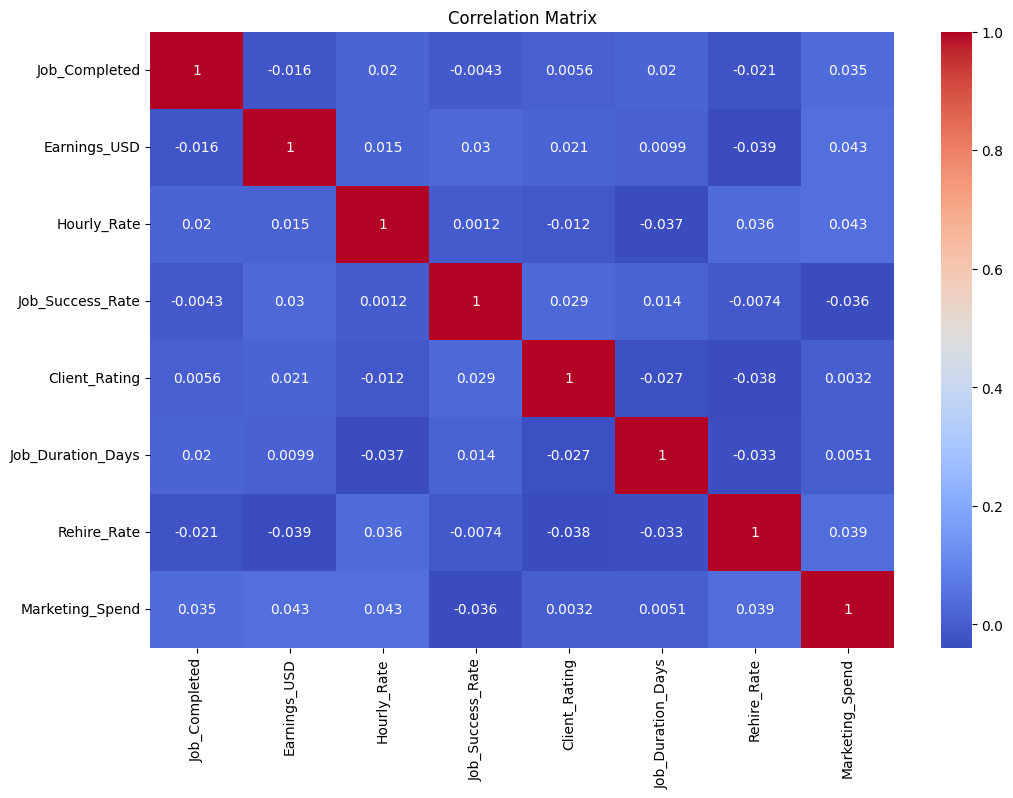

In [116]:
# Step 4: Visualize correlation among numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [117]:
# # Step 5: Prepare features and target (log-transformed earnings)
# X = df.drop(columns=['Earnings_USD'])
# y = np.log1p(df['Earnings_USD'])  # log1p handles zero values safely


In [118]:
# # Step 6: Identify numerical and categorical columns
# categorical_cols = X.select_dtypes(include='object').columns.tolist()
# numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [119]:
# # Step 7: Create preprocessing pipeline
# preprocessor = ColumnTransformer([
#     ('num', StandardScaler(), numerical_cols),
#     ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
# ])


In [120]:
# # Step 8: Create the regression pipeline with Random Forest
# model = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
# ])


In [121]:
# # Step 9: Split data and train the model
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# model.fit(X_train, y_train)


In [122]:
# # Step 10: Predict and evaluate
# from math import sqrt
# y_pred = model.predict(X_test)
# rmse = sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)

# print("RMSE (log scale):", rmse)
# print("R² Score:", r2)


In [123]:

# # Get feature names from the preprocessor
# feature_names_num = numerical_cols
# feature_names_cat = model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols)
# feature_names = np.concatenate([feature_names_num, feature_names_cat])

# # Get importances
# importances = model.named_steps['regressor'].feature_importances_

# # Create and sort dataframe
# feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# feat_df = feat_df.sort_values(by='Importance', ascending=False).head(20)

# # Plot
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Importance', y='Feature', data=feat_df)
# plt.title("Top 20 Feature Importances")
# plt.show()


In [124]:
# Make a copy to preserve original
df_fe = df.copy()

# Feature engineering
df_fe['Earnings_per_Job'] = df_fe['Earnings_USD'] / (df_fe['Job_Completed'] + 1)
df_fe['Earnings_per_Day'] = df_fe['Earnings_USD'] / (df_fe['Job_Duration_Days'] + 1)
df_fe['Marketing_Efficiency'] = df_fe['Earnings_USD'] / (df_fe['Marketing_Spend'] + 1)
df_fe['Success_x_Rehire'] = df_fe['Job_Success_Rate'] * df_fe['Rehire_Rate']
df_fe['Log_Earnings_USD'] = np.log1p(df_fe['Earnings_USD'])
df_fe


,Job_Category,Platform,Experience_Level,Client_Region,Payment_Method,Job_Completed,Earnings_USD,Hourly_Rate,Job_Success_Rate,Client_Rating,Job_Duration_Days,Project_Type,Rehire_Rate,Marketing_Spend,Earnings_per_Job,Earnings_per_Day,Marketing_Efficiency,Success_x_Rehire,Log_Earnings_USD
0,Web Development,Fiverr,Beginner,Asia,Mobile Banking,180,1620,95.79,68.73,3.18,1,Fixed,40.19,53,8.950276,810.000000,30.000000,2762.2587,7.390799
1,App Development,Fiverr,Beginner,Australia,Mobile Banking,218,9078,86.38,97.54,3.44,54,Fixed,36.53,486,41.452055,165.054545,18.640657,3563.1362,9.113719
2,Web Development,Fiverr,Beginner,UK,Crypto,27,3455,85.17,86.60,4.20,46,Hourly,74.05,489,123.392857,73.510638,7.051020,6412.7300,8.147867
3,Data Entry,PeoplePerHour,Intermediate,Asia,Bank Transfer,17,5577,14.37,79.93,4.47,41,Hourly,27.58,67,309.833333,132.785714,82.014706,2204.4694,8.626586
4,Digital Marketing,Upwork,Expert,Asia,Crypto,245,5898,99.37,57.80,5.00,41,Hourly,69.09,489,23.975610,140.428571,12.036735,3993.4020,8.682538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,Graphic Design,Fiverr,Beginner,USA,Mobile Banking,143,6823,22.54,75.86,4.65,13,Hourly,26.55,133,47.381944,487.357143,50.917910,2014.0830,8.828201
1946,SEO,Upwork,Intermediate,Middle East,Crypto,164,7942,77.20,72.01,3.29,34,Hourly,24.81,343,48.133333,226.914286,23.087209,1786.5681,8.980046
1947,SEO,PeoplePerHour,Expert,UK,Bank Transfer,236,9838,24.64,57.37,4.67,38,Fixed,61.52,370,41.510549,252.256410,26.517520,3529.4024,9.194109
1948,SEO,Freelancer,Intermediate,Europe,Bank Transfer,152,4492,71.07,66.41,4.08,70,Fixed,32.40,32,29.359477,63.267606,136.121212,2151.6840,8.410276


In [125]:
# Define target
target = 'Rehire_Rate'

#Prepare features and target
X_rehire = df_fe.drop(columns=[target, 'Success_x_Rehire'])
y_rehire = df_fe[target]

# # Drop 'Earnings_USD' and log version since they leak info
# X_rehire = X_rehire.drop(columns=['Success_x_Rehire'])

In [126]:
X_rehire

,Job_Category,Platform,Experience_Level,Client_Region,Payment_Method,Job_Completed,Earnings_USD,Hourly_Rate,Job_Success_Rate,Client_Rating,Job_Duration_Days,Project_Type,Marketing_Spend,Earnings_per_Job,Earnings_per_Day,Marketing_Efficiency,Log_Earnings_USD
0,Web Development,Fiverr,Beginner,Asia,Mobile Banking,180,1620,95.79,68.73,3.18,1,Fixed,53,8.950276,810.000000,30.000000,7.390799
1,App Development,Fiverr,Beginner,Australia,Mobile Banking,218,9078,86.38,97.54,3.44,54,Fixed,486,41.452055,165.054545,18.640657,9.113719
2,Web Development,Fiverr,Beginner,UK,Crypto,27,3455,85.17,86.60,4.20,46,Hourly,489,123.392857,73.510638,7.051020,8.147867
3,Data Entry,PeoplePerHour,Intermediate,Asia,Bank Transfer,17,5577,14.37,79.93,4.47,41,Hourly,67,309.833333,132.785714,82.014706,8.626586
4,Digital Marketing,Upwork,Expert,Asia,Crypto,245,5898,99.37,57.80,5.00,41,Hourly,489,23.975610,140.428571,12.036735,8.682538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,Graphic Design,Fiverr,Beginner,USA,Mobile Banking,143,6823,22.54,75.86,4.65,13,Hourly,133,47.381944,487.357143,50.917910,8.828201
1946,SEO,Upwork,Intermediate,Middle East,Crypto,164,7942,77.20,72.01,3.29,34,Hourly,343,48.133333,226.914286,23.087209,8.980046
1947,SEO,PeoplePerHour,Expert,UK,Bank Transfer,236,9838,24.64,57.37,4.67,38,Fixed,370,41.510549,252.256410,26.517520,9.194109
1948,SEO,Freelancer,Intermediate,Europe,Bank Transfer,152,4492,71.07,66.41,4.08,70,Fixed,32,29.359477,63.267606,136.121212,8.410276


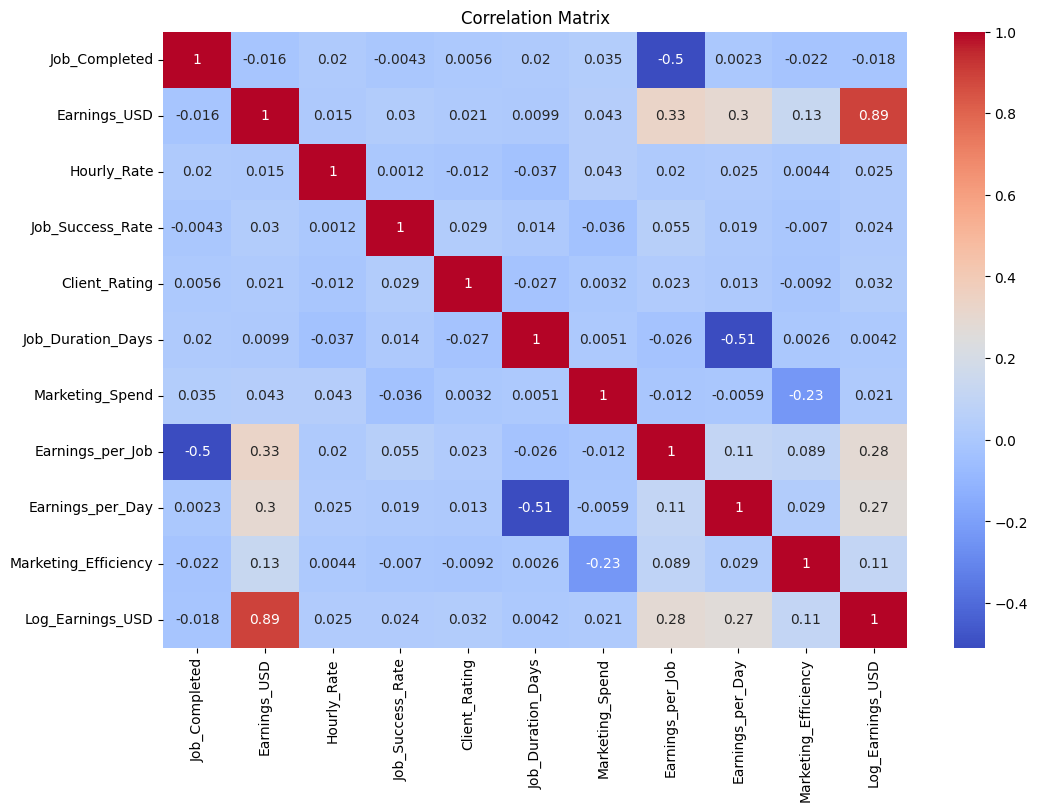

In [127]:
# Step 4: Visualize correlation among numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(X_rehire.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [128]:
import numpy as np
import random

# Set random seed
random.seed(42)
np.random.seed(42)

In [129]:
class GaussianNoiseAdder(BaseEstimator, TransformerMixin):
    def __init__(self, mean=0.0, std=0.01):
        self.mean = mean
        self.std = std

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        noise = np.random.normal(loc=self.mean, scale=self.std, size=X.shape)
        return X + noise


In [130]:
#Detect types
categorical_cols_rehire = X_rehire.select_dtypes(include='object').columns.tolist()
numerical_cols_rehire = X_rehire.select_dtypes(include=['int64', 'float64']).columns.tolist()


X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_rehire, y_rehire, test_size=0.1, random_state=42
)


In [131]:
numerical_cols_rehire

['Job_Completed',
 'Earnings_USD',
 'Hourly_Rate',
 'Job_Success_Rate',
 'Client_Rating',
 'Job_Duration_Days',
 'Marketing_Spend',
 'Earnings_per_Job',
 'Earnings_per_Day',
 'Marketing_Efficiency',
 'Log_Earnings_USD']

In [132]:
discrete_cols_rehire = X_rehire.select_dtypes(include='int64').columns.tolist()

continuous_cols_rehire = list(set(numerical_cols_rehire) - set(discrete_cols_rehire))

In [133]:
continuous_cols_rehire

['Marketing_Efficiency',
 'Log_Earnings_USD',
 'Client_Rating',
 'Earnings_per_Day',
 'Job_Success_Rate',
 'Hourly_Rate',
 'Earnings_per_Job']

In [134]:
# Preprocessing (scale numeric, encode categorical)
# preprocessor = ColumnTransformer([
#     ('num', StandardScaler(), discrete_cols_rehire),
#     ('discrete', KBinsDiscretizer(n_bins=5), continuous_cols_rehire),
#     ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_rehire)
# ])


preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('gaussian_noise', GaussianNoiseAdder(mean=0.0, std=0.001))
    ]), numerical_cols_rehire),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols_rehire)
])


In [135]:
'''
    Linear Regression Model
'''

# Full pipeline
rehire_linear_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train model
rehire_linear_model.fit(X_train_r, y_train_r)

# Predict
y_pred_linear_r = rehire_linear_model.predict(X_test_r)

# Evaluate
rmse_linear = sqrt(mean_squared_error(y_test_r, y_pred_linear_r))
r2 = r2_score(y_test_r, y_pred_linear_r)

print(f"Linear Model RMSE: {rmse_linear:.4f}")
print(f"Linear Model R²: {r2:.4f}")


Linear Model RMSE: 21.1745
Linear Model R²: -0.0581


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


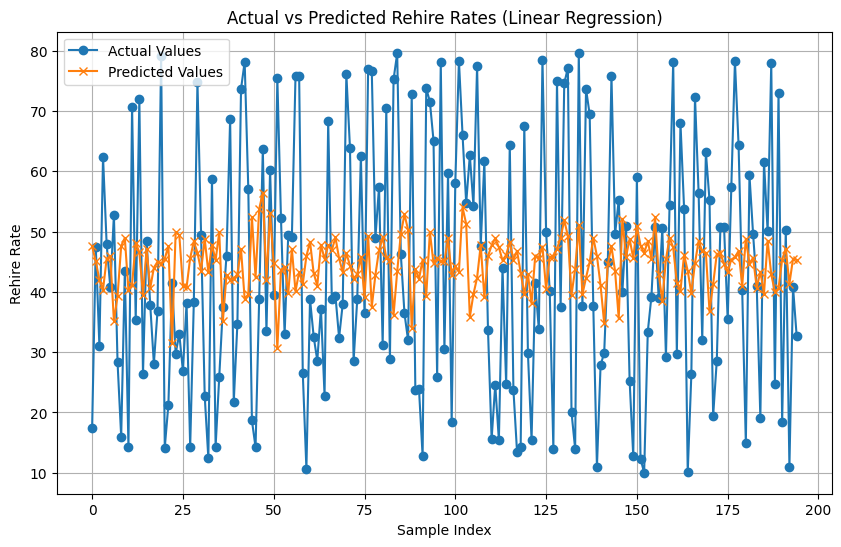

In [136]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_r.values, label='Actual Values', marker='o')
plt.plot(y_pred_linear_r, label='Predicted Values', marker='x')
plt.title('Actual vs Predicted Rehire Rates (Linear Regression)')
plt.xlabel('Sample Index')
plt.ylabel('Rehire Rate')
plt.legend()
plt.grid(True)
plt.show()

In [137]:
'''
    Decision Tree Regression Model
'''

# Decision Tree Pipeline
tree_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth = 100, random_state=42))
])

# Train
tree_model.fit(X_train_r, y_train_r)

# Predict and Evaluate
y_pred_dt_r = tree_model.predict(X_test_r)
rmse_dt = sqrt(mean_squared_error(y_test_r, y_pred_dt_r))
r2_dt = r2_score(y_test_r, y_pred_dt_r)

print(f"Decision Tree RMSE: {rmse_dt:.4f}")
print(f"Decision Tree R²: {r2_dt:.4f}")

Decision Tree RMSE: 28.2556
Decision Tree R²: -0.8842


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


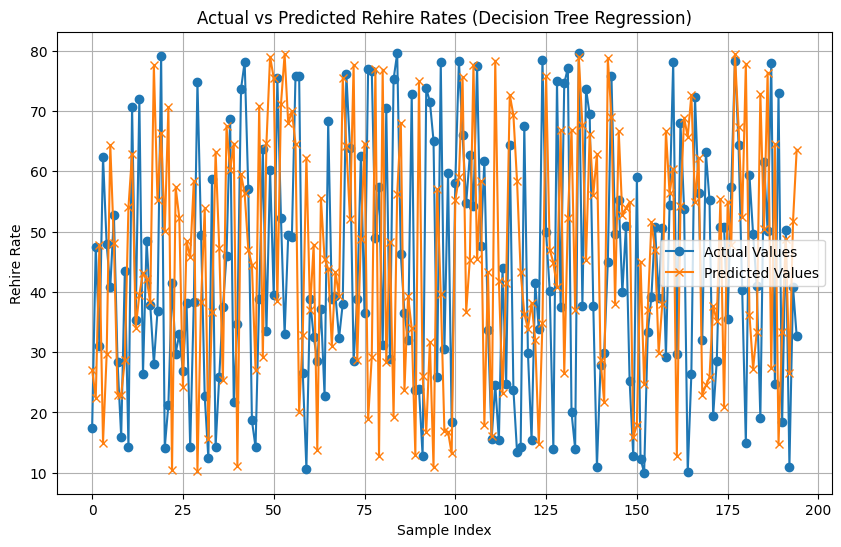

In [138]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_r.values, label='Actual Values', marker='o')
plt.plot(y_pred_dt_r, label='Predicted Values', marker='x')
plt.title('Actual vs Predicted Rehire Rates (Decision Tree Regression)')
plt.xlabel('Sample Index')
plt.ylabel('Rehire Rate')
plt.legend()
plt.grid(True)
plt.show()

In [139]:
'''
    RandomForestRegressor
'''
#Pipeline

rehire_rfr_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit model
rehire_rfr_model.fit(X_train_r, y_train_r)

#Predict and evaluate

y_pred_rfr_r = rehire_rfr_model.predict(X_test_r)
rmse_r = sqrt(mean_squared_error(y_test_r, y_pred_rfr_r))
r2_r = r2_score(y_test_r, y_pred_rfr_r)


print("Rehire Rate RMSE:", rmse_r)
print("Rehire Rate R²:", r2_r)


Rehire Rate RMSE: 21.088685840492158
Rehire Rate R²: -0.04957790128598871


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


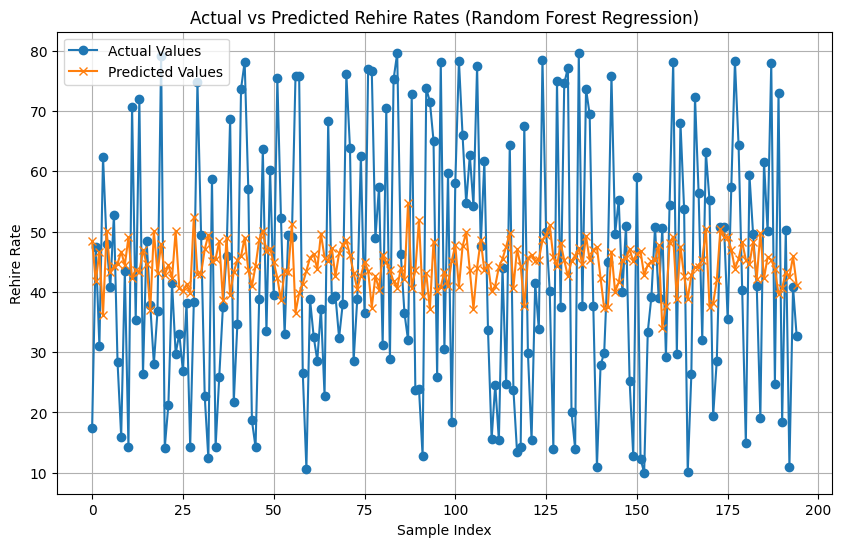

In [140]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_r.values, label='Actual Values', marker='o')
plt.plot(y_pred_rfr_r, label='Predicted Values', marker='x')
plt.title('Actual vs Predicted Rehire Rates (Random Forest Regression)')
plt.xlabel('Sample Index')
plt.ylabel('Rehire Rate')
plt.legend()
plt.grid(True)
plt.show()

In [141]:
'''
    MLP
'''
#Pipeline
rehire_mlp_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor(hidden_layer_sizes=(100), max_iter=1000, random_state=42, activation = 'logistic'))
])

# Fit model
rehire_mlp_model.fit(X_train_r, y_train_r)

#Predict and evaluate

y_pred_mlp_r = rehire_mlp_model.predict(X_test_r)
rmse_r = sqrt(mean_squared_error(y_test_r, y_pred_mlp_r))
r2_r = r2_score(y_test_r, y_pred_mlp_r)


print("Rehire Rate RMSE:", rmse_r)
print("Rehire Rate R²:", r2_r)


Rehire Rate RMSE: 21.32763358626521
Rehire Rate R²: -0.07349737184074323


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


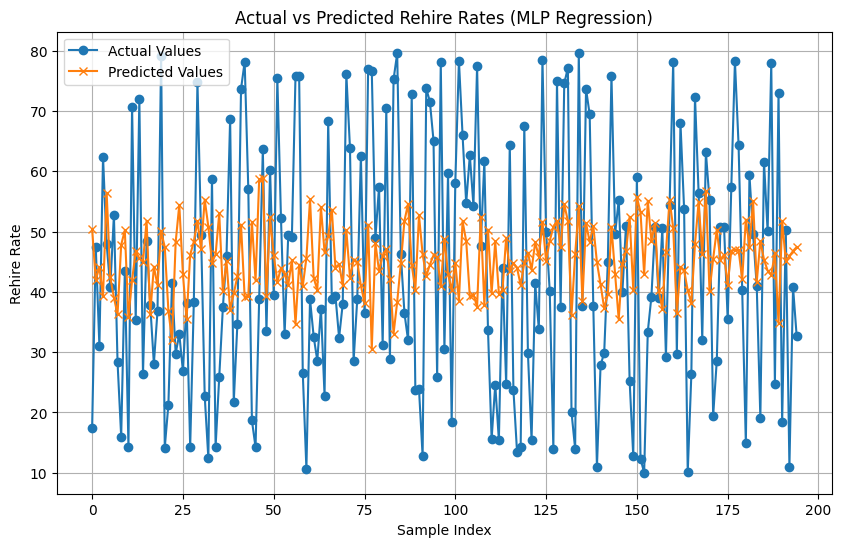

In [142]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_r.values, label='Actual Values', marker='o')
plt.plot(y_pred_mlp_r, label='Predicted Values', marker='x')
plt.title('Actual vs Predicted Rehire Rates (MLP Regression)')
plt.xlabel('Sample Index')
plt.ylabel('Rehire Rate')
plt.legend()
plt.grid(True)
plt.show()

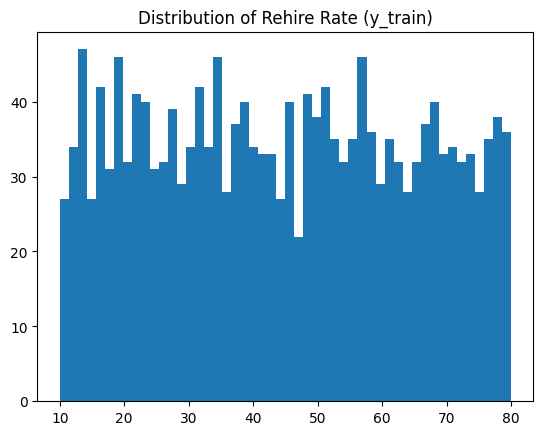

In [104]:
import matplotlib.pyplot as plt
plt.hist(y_train_r, bins=50)
plt.title("Distribution of Rehire Rate (y_train)")
plt.show()

Text(0.5, 0.98, 'Distribution of Features after Preprocessing')

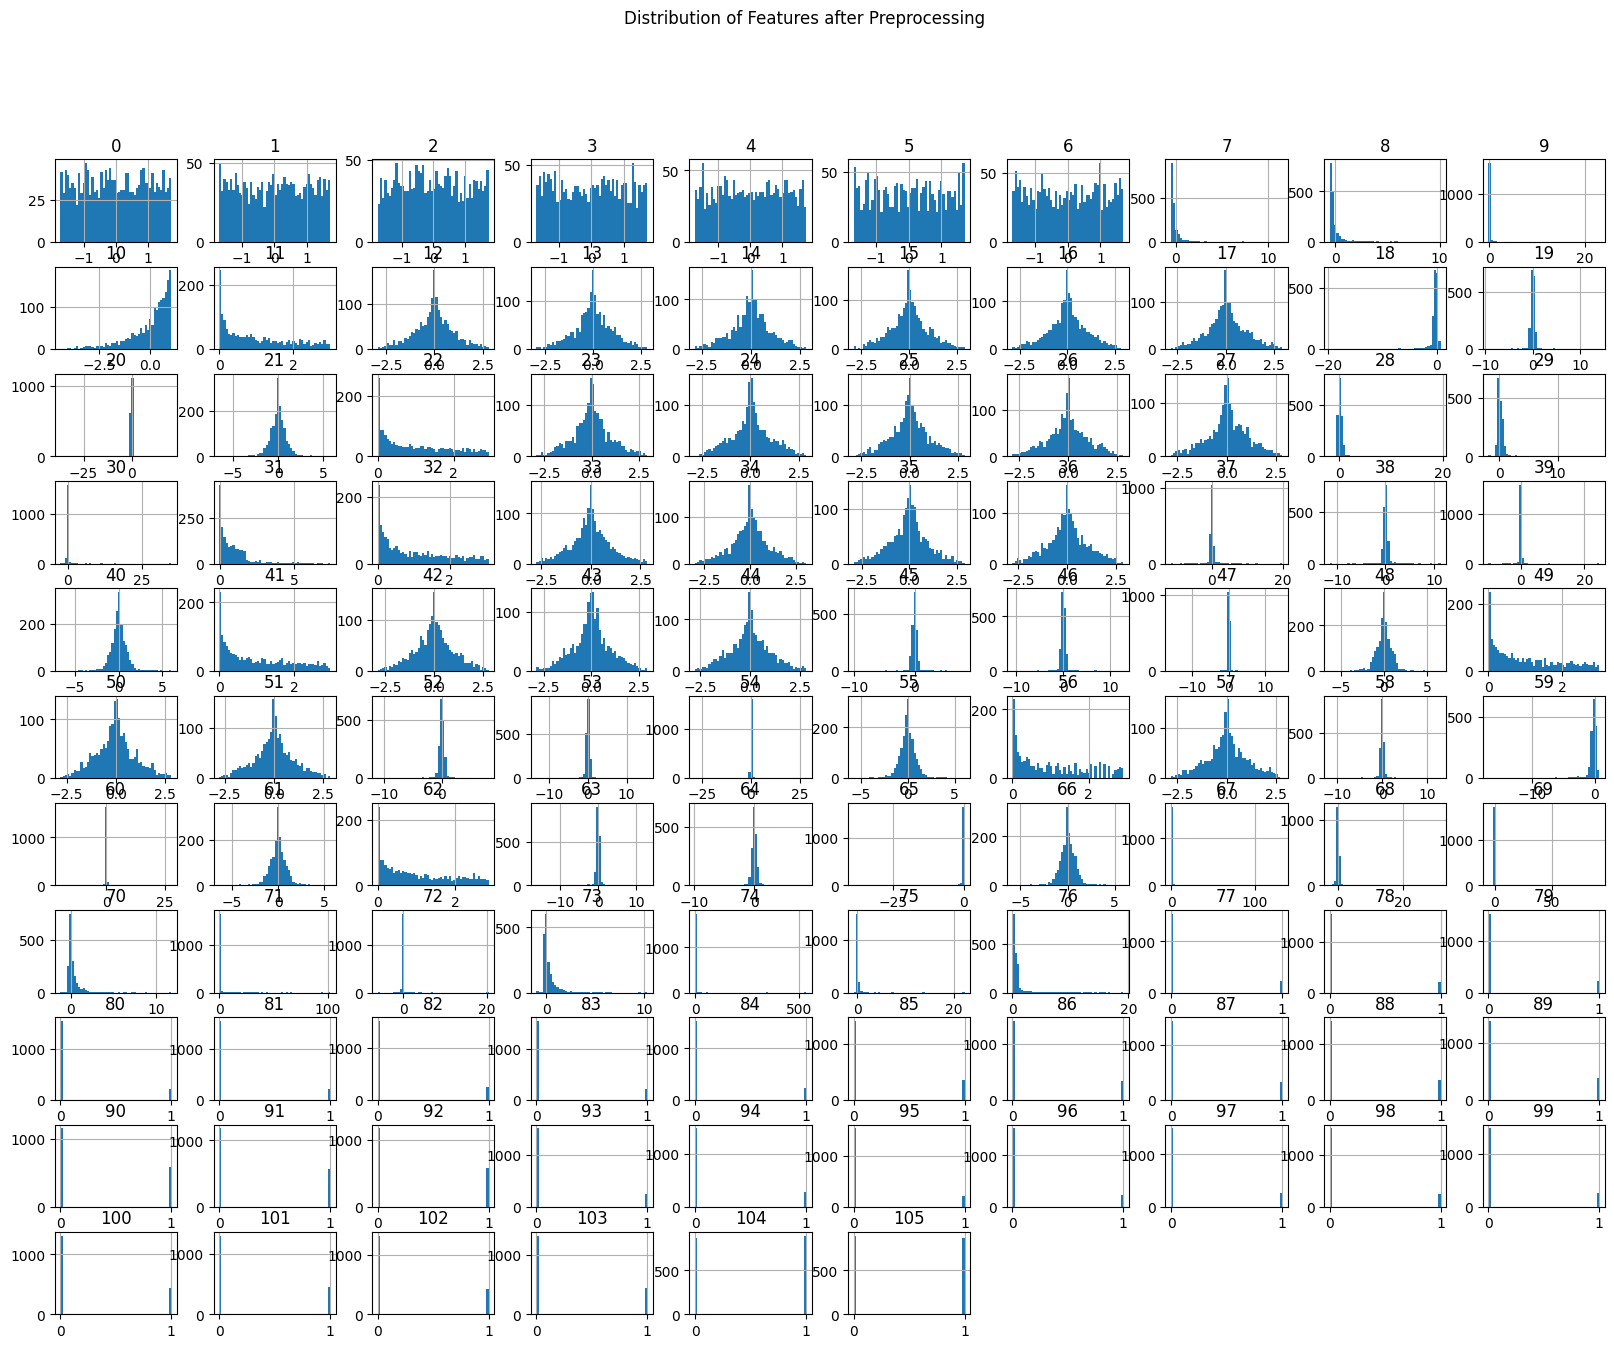

In [105]:
processed_X_train_r = preprocessor.fit_transform(X_train_r)
pd.DataFrame(processed_X_train_r).hist(bins=50, figsize=(20, 15))
plt.suptitle("Distribution of Features after Preprocessing")

In [106]:
'''
    Gradient Boosting Regressor
'''
#Pipeline
rehire_gb_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=200, random_state=42))
])
# Fit model
rehire_gb_model.fit(X_train_r, y_train_r)
#Predict and evaluate
y_pred_gb_r = rehire_gb_model.predict(X_test_r)
rmse_r = sqrt(mean_squared_error(y_test_r, y_pred_gb_r))
r2_r = r2_score(y_test_r, y_pred_gb_r)
print("Rehire Rate RMSE:", rmse_r)
print("Rehire Rate R²:", r2_r)

Rehire Rate RMSE: 21.855966956061355
Rehire Rate R²: -0.12734201901699227


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


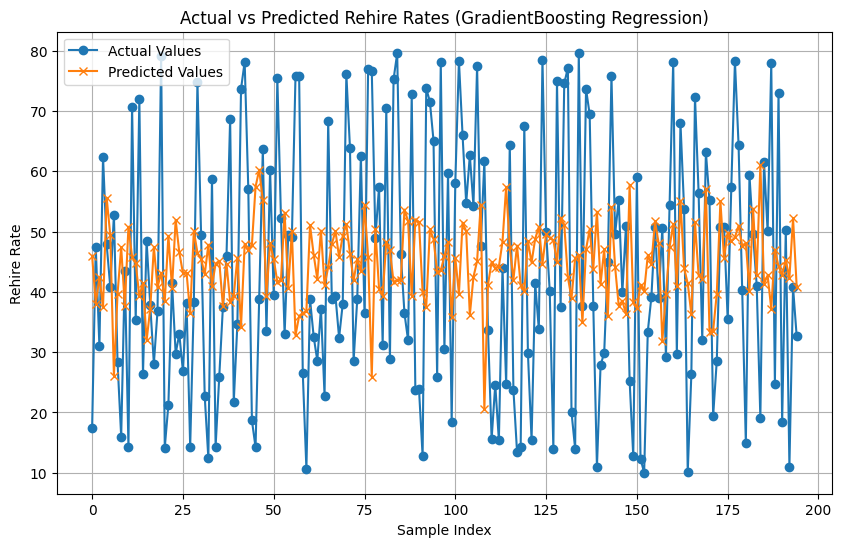

In [107]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_r.values, label='Actual Values', marker='o')
plt.plot(y_pred_gb_r, label='Predicted Values', marker='x')
plt.title('Actual vs Predicted Rehire Rates (GradientBoosting Regression)')
plt.xlabel('Sample Index')
plt.ylabel('Rehire Rate')
plt.legend()
plt.grid(True)
plt.show()

In [108]:
'''
    HistGradientBoostingRegressor
'''
#Pipeline
model = HistGradientBoostingRegressor(
    max_iter=300,         # More boosting rounds
    learning_rate=0.01,   # Lower LR with more rounds
    max_depth=8,          # Deeper trees capture complex patterns
    min_samples_leaf=5,   # Allow smaller leaves
    l2_regularization=0.0 # Remove regularization to test flexibility
)


rehire_hgb_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', model)
])
# Fit model
rehire_hgb_model.fit(X_train_r, y_train_r)
#Predict and evaluate
y_pred_hgb_r = rehire_hgb_model.predict(X_test_r)
rmse_r = sqrt(mean_squared_error(y_test_r, y_pred_hgb_r))
r2_r = r2_score(y_test_r, y_pred_hgb_r)
print("Rehire Rate RMSE:", rmse_r)
print("Rehire Rate R²:", r2_r)

Rehire Rate RMSE: 20.909568922211676
Rehire Rate R²: -0.03182442125238638


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


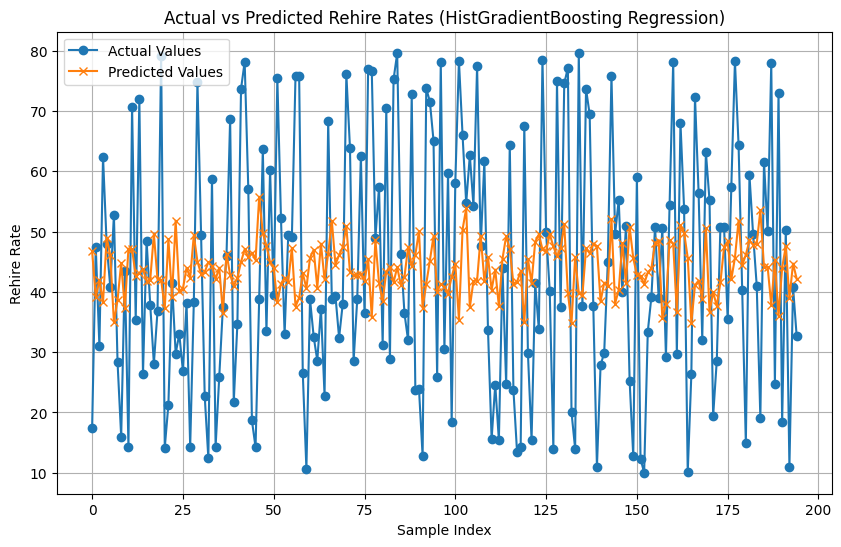

In [109]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_r.values, label='Actual Values', marker='o')
plt.plot(y_pred_hgb_r, label='Predicted Values', marker='x')
plt.title('Actual vs Predicted Rehire Rates (HistGradientBoosting Regression)')
plt.xlabel('Sample Index')
plt.ylabel('Rehire Rate')
plt.legend()
plt.grid(True)
plt.show()

In [110]:
X_train_r

,Job_Category,Platform,Experience_Level,Client_Region,Payment_Method,Job_Completed,Earnings_USD,Hourly_Rate,Job_Success_Rate,Client_Rating,Job_Duration_Days,Project_Type,Marketing_Spend,Earnings_per_Job,Earnings_per_Day,Marketing_Efficiency,Log_Earnings_USD
704,Graphic Design,Freelancer,Beginner,Middle East,Crypto,39,2488,63.82,53.17,4.54,13,Hourly,435,62.200000,177.714286,5.706422,7.819636
818,Web Development,Toptal,Beginner,Middle East,Mobile Banking,201,2852,36.21,52.74,4.00,70,Hourly,314,14.118812,40.169014,9.053968,7.956126
1473,Content Writing,Freelancer,Intermediate,Middle East,Mobile Banking,91,5496,99.70,70.21,3.08,79,Fixed,379,59.739130,68.700000,14.463158,8.611958
909,Customer Support,Upwork,Expert,Europe,PayPal,292,1752,23.51,68.98,3.35,64,Fixed,186,5.979522,26.953846,9.368984,7.469084
115,App Development,PeoplePerHour,Expert,Asia,Mobile Banking,213,8138,32.72,93.57,4.57,88,Hourly,289,38.028037,91.438202,28.062069,9.004423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,Graphic Design,Toptal,Intermediate,UK,Bank Transfer,261,7711,28.02,86.17,4.47,32,Hourly,144,29.431298,233.666667,53.179310,8.950533
1294,Web Development,Freelancer,Beginner,USA,Crypto,234,4937,17.99,90.03,4.40,74,Hourly,259,21.008511,65.826667,18.988462,8.504716
860,Customer Support,Upwork,Expert,Middle East,PayPal,45,5342,25.11,88.78,3.49,18,Hourly,128,116.130435,281.157895,41.410853,8.583543
1459,Data Entry,Toptal,Intermediate,Europe,Mobile Banking,90,2866,12.09,82.94,3.08,73,Fixed,273,31.494505,38.729730,10.459854,7.961021


In [111]:
# 2. Client Region Risk Score
region_avg_rehire = df_fe.groupby('Client_Region')['Rehire_Rate'].mean()
df_fe['Client_Region_Risk'] = df_fe['Client_Region'].map(region_avg_rehire)

In [41]:
# (Log of (Total Duration / Jobs Completed)) Normalizes extreme work durations. Freelancers who take too long or too short to finish jobs could impact client satisfaction and rehire decisions.

df_fe['Log_Hours_per_Job'] = np.log1p(df_fe['Job_Duration_Days'] / (df_fe['Job_Completed'] + 1))


In [42]:
# Captures how much work is driven by client loyalty 
df_fe['Repeat_Client_Proxy'] = df_fe['Rehire_Rate'] / (df_fe['Job_Completed'] + 1)


In [43]:
# a proxy for how consistently high-quality a freelancer’s work is
df_fe['Rating_per_Job'] = df_fe['Client_Rating'] / (df_fe['Job_Completed'] + 1)

In [44]:
# 3. Encode Experience Level
exp_map = {'Beginner': 0, 'Intermediate': 1, 'Expert': 2}
df_fe['Experience_Level_Num'] = df_fe['Experience_Level'].map(exp_map)

In [45]:
df_fe

,Job_Category,Platform,Experience_Level,Client_Region,Payment_Method,Job_Completed,Earnings_USD,Hourly_Rate,Job_Success_Rate,Client_Rating,...,Earnings_per_Job,Earnings_per_Day,Marketing_Efficiency,Success_x_Rehire,Log_Earnings_USD,Client_Region_Risk,Log_Hours_per_Job,Repeat_Client_Proxy,Rating_per_Job,Experience_Level_Num
0,Web Development,Fiverr,Beginner,Asia,Mobile Banking,180,1620,95.79,68.73,3.18,...,8.950276,810.000000,30.000000,2762.2587,7.390799,42.888648,0.005510,0.222044,0.017569,0
1,App Development,Fiverr,Beginner,Australia,Mobile Banking,218,9078,86.38,97.54,3.44,...,41.452055,165.054545,18.640657,3563.1362,9.113719,44.875168,0.220400,0.166804,0.015708,0
2,Web Development,Fiverr,Beginner,UK,Crypto,27,3455,85.17,86.60,4.20,...,123.392857,73.510638,7.051020,6412.7300,8.147867,46.404714,0.971861,2.644643,0.150000,0
3,Data Entry,PeoplePerHour,Intermediate,Asia,Bank Transfer,17,5577,14.37,79.93,4.47,...,309.833333,132.785714,82.014706,2204.4694,8.626586,42.888648,1.187166,1.532222,0.248333,1
4,Digital Marketing,Upwork,Expert,Asia,Crypto,245,5898,99.37,57.80,5.00,...,23.975610,140.428571,12.036735,3993.4020,8.682538,42.888648,0.154151,0.280854,0.020325,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,Graphic Design,Fiverr,Beginner,USA,Mobile Banking,143,6823,22.54,75.86,4.65,...,47.381944,487.357143,50.917910,2014.0830,8.828201,44.412123,0.086433,0.184375,0.032292,0
1946,SEO,Upwork,Intermediate,Middle East,Crypto,164,7942,77.20,72.01,3.29,...,48.133333,226.914286,23.087209,1786.5681,8.980046,44.262749,0.187359,0.150364,0.019939,1
1947,SEO,PeoplePerHour,Expert,UK,Bank Transfer,236,9838,24.64,57.37,4.67,...,41.510549,252.256410,26.517520,3529.4024,9.194109,46.404714,0.148711,0.259578,0.019705,2
1948,SEO,Freelancer,Intermediate,Europe,Bank Transfer,152,4492,71.07,66.41,4.08,...,29.359477,63.267606,136.121212,2151.6840,8.410276,43.939466,0.376734,0.211765,0.026667,1


In [58]:
target = 'Rehire_Rate'

# 2. Prepare features and target
X_rehire = df_fe.drop(columns=[target])
y_rehire = df_fe[target]

# Optional: Drop 'Earnings_USD' and log version since they leak info
X_rehire = X_rehire.drop(columns=[ 'Earnings_USD', 'Log_Earnings_USD', 'Success_x_Rehire','Repeat_Client_Proxy'  ])

In [59]:
# 3. Detect types
categorical_cols_rehire = X_rehire.select_dtypes(include='object').columns.tolist()
numerical_cols_rehire = X_rehire.select_dtypes(include=['int64', 'float64']).columns.tolist()


X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_rehire, y_rehire, test_size=0.2, random_state=42
)


In [60]:
# Preprocessing (scale numeric, encode categorical)
rehire_linear_preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols_rehire),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_rehire)
])

# Full pipeline
rehire_linear_model = Pipeline([
    ('preprocessor', rehire_linear_preprocessor),
    ('regressor', LinearRegression())
])

# Train model
rehire_linear_model.fit(X_train_r, y_train_r)

# Predict
y_pred_linear_r = rehire_linear_model.predict(X_test_r)

# Evaluate
rmse_linear = mean_squared_error(y_test_r, y_pred_linear_r)
r2 = r2_score(y_test_r, y_pred_linear_r)

print(f"Simple Model RMSE: {rmse_linear:.4f}")
print(f"Simple Model R²: {r2:.4f}")


Simple Model RMSE: 418.1538
Simple Model R²: -0.0166


In [61]:
#DecisionTreeRegressor
Decision_tree_preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols_rehire),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_rehire)
])

# Decision Tree Pipeline
tree_model = Pipeline([
    ('preprocessor', Decision_tree_preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=10, random_state=42))
])

# Train
tree_model.fit(X_train_r, y_train_r)

# Predict and Evaluate
y_pred_dt_r = tree_model.predict(X_test_r)
rmse_dt = mean_squared_error(y_test_r, y_pred_dt_r)
r2_dt = r2_score(y_test_r, y_pred_dt_r)

print(f"Decision Tree RMSE: {rmse_dt:.4f}")
print(f"Decision Tree R²: {r2_dt:.4f}")

Decision Tree RMSE: 611.1267
Decision Tree R²: -0.4858


In [62]:
#RandomForestRegressor
#Pipeline
rehire_rfr_preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols_rehire),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_rehire)
])

rehire_rfr_model = Pipeline([
    ('preprocessor', rehire_rfr_preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit model
rehire_rfr_model.fit(X_train_r, y_train_r)

#Predict and evaluate

y_pred_rfr_r = rehire_rfr_model.predict(X_test_r)
rmse_r = sqrt(mean_squared_error(y_test_r, y_pred_rfr_r))
r2_r = r2_score(y_test_r, y_pred_rfr_r)


print(" Rehire Rate RMSE:", rmse_r)
print(" Rehire Rate R²:", r2_r)


 Rehire Rate RMSE: 20.648249644875534
 Rehire Rate R²: -0.03653229053724738


In [63]:
#RandomForestRegressor
#Pipeline
rehire_rfr_preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols_rehire),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_rehire)
])

rehire_rfr_model = Pipeline([
    ('preprocessor', rehire_rfr_preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit model
rehire_rfr_model.fit(X_train_r, y_train_r)

#Predict and evaluate

y_pred_rfr_r = rehire_rfr_model.predict(X_test_r)
rmse_r = sqrt(mean_squared_error(y_test_r, y_pred_rfr_r))
r2_r = r2_score(y_test_r, y_pred_rfr_r)


print(" Rehire Rate RMSE:", rmse_r)
print(" Rehire Rate R²:", r2_r)


 Rehire Rate RMSE: 20.648249644875534
 Rehire Rate R²: -0.03653229053724738


In [64]:
# Preprocessing (scale numeric, encode categorical)
rehire_linear_preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols_rehire),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_rehire)
])

# Preprocessor with polynomial features
poly_preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2, include_bias=False))
    ]), numerical_cols_rehire),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_rehire)
])

# Pipeline with linear regression
poly_model = Pipeline([
    ('preprocessor', poly_preprocessor),
    ('regressor', LinearRegression())
])

# Train model
poly_model.fit(X_train_r, y_train_r)

# Predict
y_pred_poly = poly_model.predict(X_test_r)

# Evaluate
rmse_poly = mean_squared_error(y_test_r, y_pred_poly)
r2_poly= r2_score(y_test_r, y_pred_poly)
cv_r2 = cross_val_score(poly_model, X_rehire, y_rehire, cv=5, scoring='r2')

print("Cross-validated R²:", cv_r2.mean())

print(f"Simple Model RMSE: {rmse_poly:.4f}")
print(f"Simple Model R²: {r2_poly:.4f}")

Cross-validated R²: -0.1707690866852265
Simple Model RMSE: 453.4841
Simple Model R²: -0.1025


In [145]:
print(X_rehire.columns)

Index(['Job_Category', 'Platform', 'Experience_Level', 'Client_Region',
       'Payment_Method', 'Job_Completed', 'Hourly_Rate', 'Job_Success_Rate',
       'Client_Rating', 'Job_Duration_Days', 'Project_Type', 'Marketing_Spend',
       'Experience_Level_Num', 'Earnings_per_Job', 'Earnings_per_Day',
       'Marketing_Efficiency', 'Client_Region_Risk', 'Log_Hours_per_Job',
       'Repeat_Client_Proxy', 'Rating_per_Job'],
      dtype='object')
